In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import env
from env import host, user, password
from pydataset import data

def get_db_url(username, hostname, password, database):
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url

In [41]:
# Use the iris database to answer the following quesitons:

url = get_db_url(user, host, password, 'iris_db')
measurements_df = pd.read_sql('SELECT * FROM measurements', url)


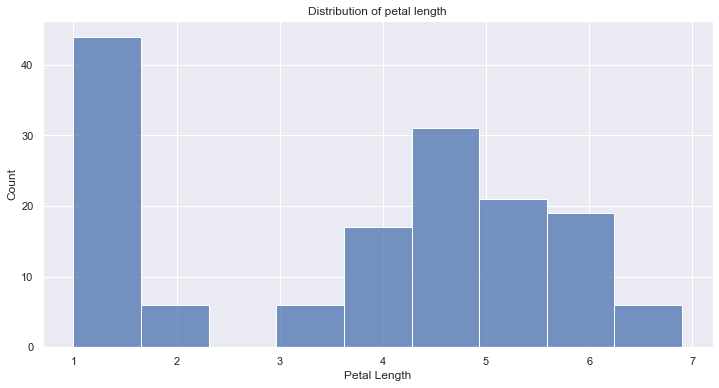

In [42]:
# What does the distribution of petal lengths look like?
plt.figure(figsize = (12,6))

sns.histplot(measurements_df.petal_length)
plt.title('Distribution of petal length')
plt.xlabel('Petal Length')
plt.show()

In [43]:
# Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could visually determine if 
# a correlation exists between two numeric columns.


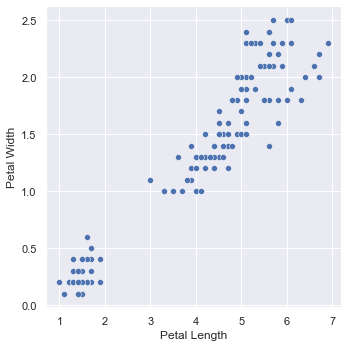

In [44]:
#plt.figure(figsize = (12,6))
sns.relplot(x='petal_length', y='petal_width', data=measurements_df)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# it appears there is correlation

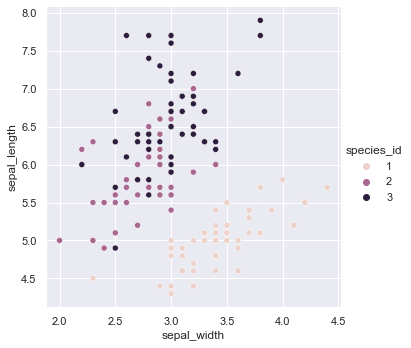

In [45]:
# Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column.

sns.relplot(x='sepal_width', y='sepal_length', hue='species_id', data=measurements_df)
plt.show()

# Based upon the chart it is not reasonable to predict species based upon sepal width and length

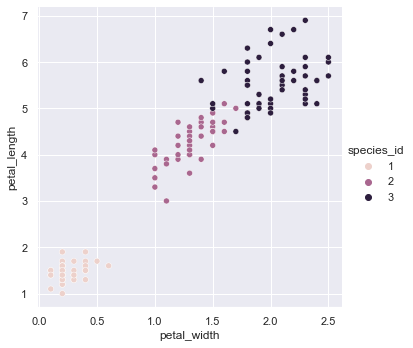

In [46]:
# Which features would be best used to predict species?

sns.relplot(x='petal_width', y='petal_length', hue='species_id', data=measurements_df)
plt.show()

# it appears petal width/length would be the most effective way to predict species

In [47]:
#Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?

In [48]:
anscombe = sns.load_dataset('anscombe')

anscombe.groupby('dataset').x.agg('mean')
anscombe.groupby('dataset').y.agg('sum')

# x and y have nearly identical averages and sums across the four datasets

dataset
I      82.51
II     82.51
III    82.50
IV     82.51
Name: y, dtype: float64

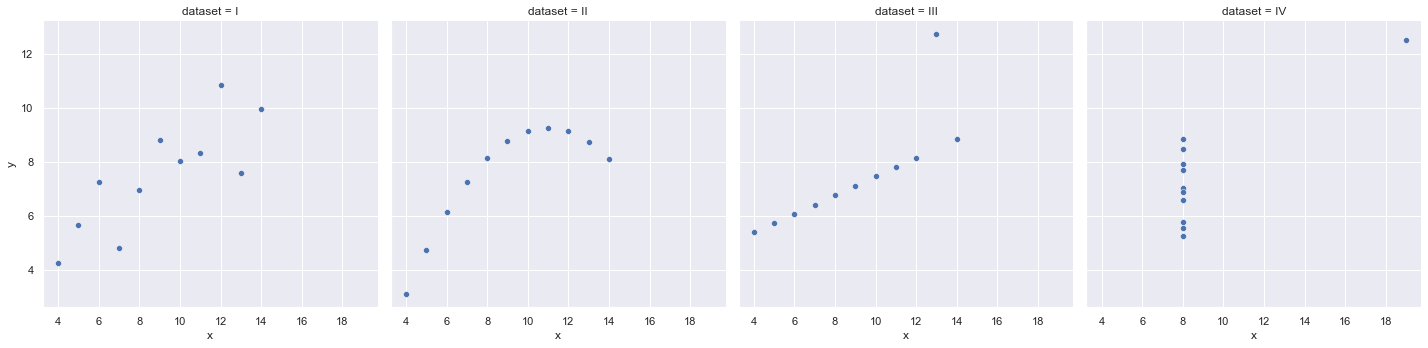

In [49]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(data=anscombe, col='dataset', x='x', y='y')
plt.show()

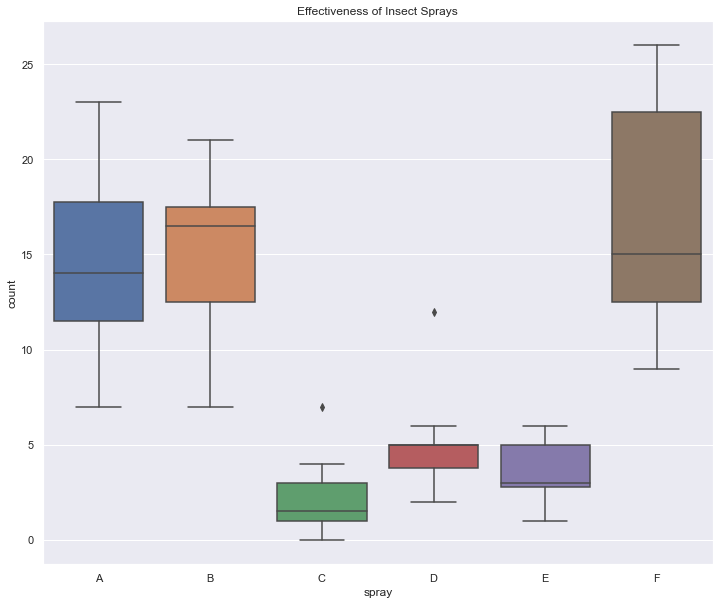

In [50]:
# Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays.

insect_sprays = data("InsectSprays")

plt.figure(figsize=(12, 10))
plt.title('Effectiveness of Insect Sprays')
sns.boxplot(data=insect_sprays, y='count', x='spray')
plt.show()

In [51]:
# Load the swiss dataset and read it's documentation. 
# The swiss dataset is available from pydatset rather than seaborn. 
# Create visualizations to answer the following questions:

swiss = data("swiss")

In [52]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss['is_catholic'] = np.where(swiss.Catholic >= 50, True, False)

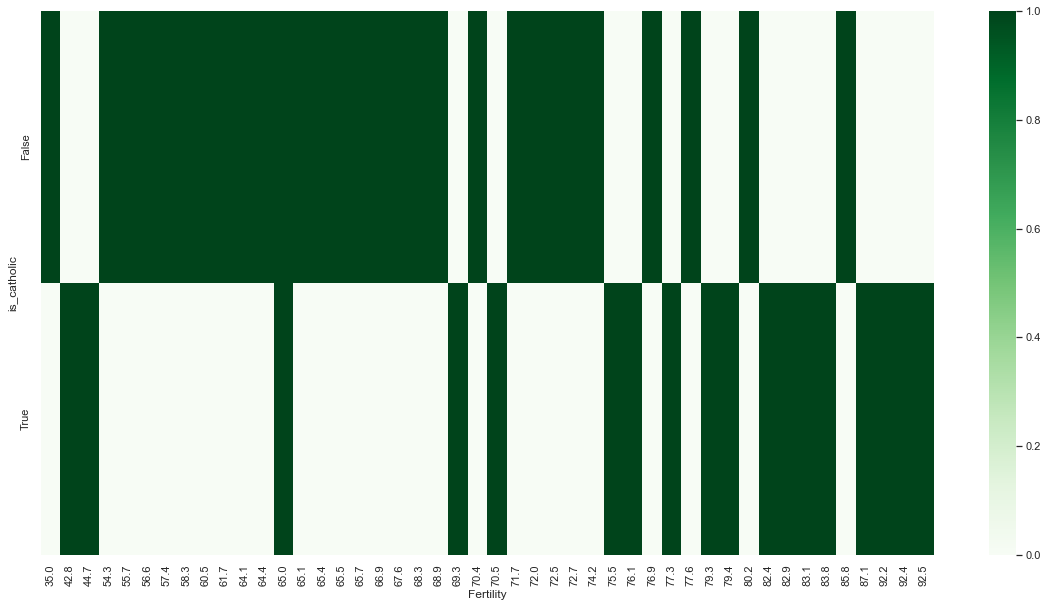

<Figure size 864x432 with 0 Axes>

In [53]:
# Does whether or not a province is Catholic influence fertility?

swiss_cross = pd.crosstab(swiss.is_catholic, swiss.Fertility)
sns.heatmap(swiss_cross, cmap=plt.cm.Greens)
plt.figure(figsize = (12,6))
plt.show()

In [54]:
# What measure correlates most strongly with fertility?

##. create a correlation table and drop the is_catholic column
swiss_correlation = swiss.corr()
swiss_correlation.drop(columns='is_catholic', inplace=True)


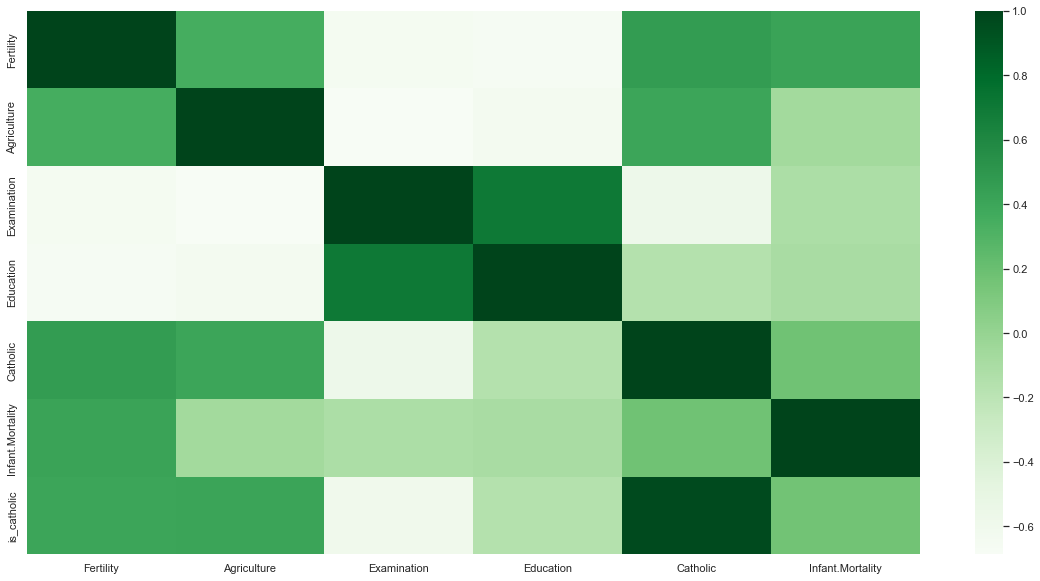

In [55]:
# show heatmap of correlation values
sns.heatmap(swiss_correlation, cmap=plt.cm.Greens)
plt.show()

In [2]:
# Using the chipotle dataset from the previous exercise, create a bar chart that 
# shows the 4 most popular items and the revenue produced by each.

# get chipotle orders table
url2 = get_db_url(user, host, password, 'chipotle')
chipotle = pd.read_sql('SELECT * FROM orders', url2)



In [3]:
#remove $ from price
chipotle['item_price'] = chipotle['item_price'].str.strip('$')
#it appears there is still a white-space.  Removing it and casting to float
chipotle['item_price'] = chipotle['item_price'].str.strip().astype('float')

In [4]:
# create table for the top 4 items by total item count.  

top4 = chipotle.groupby('item_name').agg({'item_price':'sum', 'quantity':'sum'}).nlargest(4, columns='quantity')


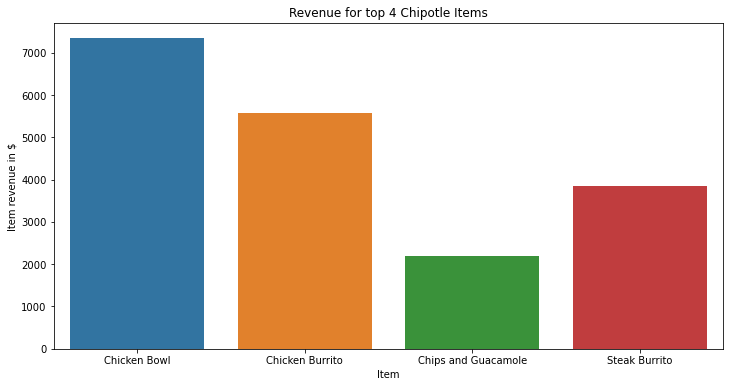

In [5]:

plt.figure(figsize = (12,6))

sns.barplot(data=top4, x=top4.index, y='item_price')
plt.title('Revenue for top 4 Chipotle Items')
plt.xlabel('Item')
plt.ylabel('Item revenue in $')
plt.show()

In [60]:
# Load the sleepstudy data and read it's documentation. 

sleep = data("sleepstudy")


In [61]:
# Use seaborn to create a line chart of all the individual subject's reaction times 
# and a more prominant line showing the average change in reaction time

# create data for average:
average_reaction = sleep.groupby('Days').agg({'Reaction':'mean'})

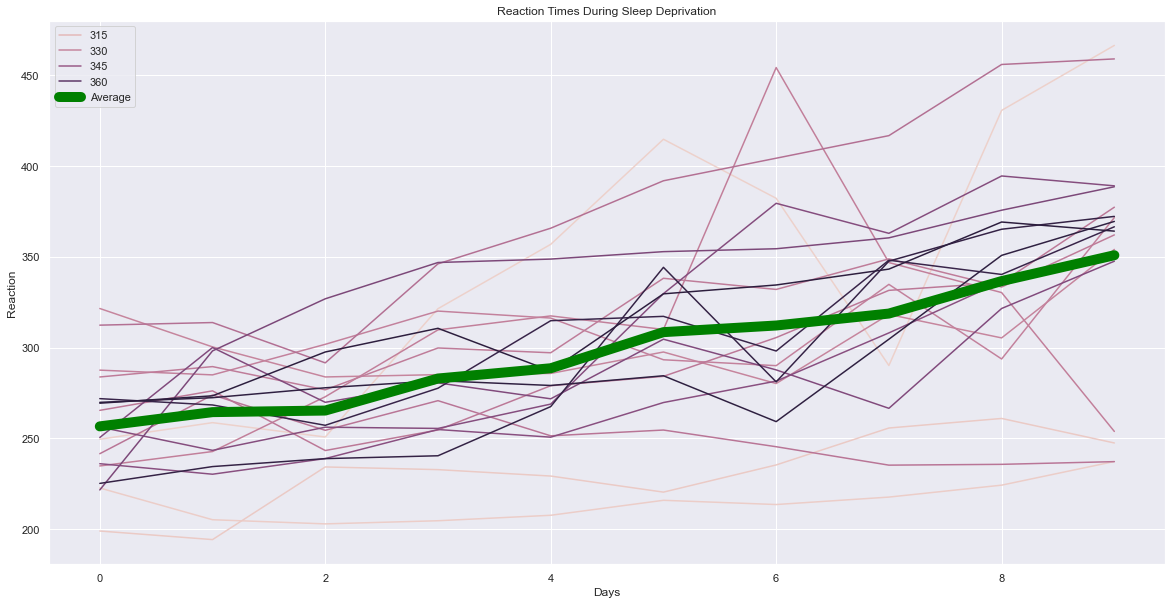

In [62]:
#Plot sleep study data
sns.lineplot(data=sleep, x='Days', y='Reaction', hue='Subject')
# add line for our average
plt.plot(average_reaction.index, average_reaction['Reaction'], c='green', linewidth = 10, label='Average')

sns.set(rc = {'figure.figsize':(20,10)})
plt.title('Reaction Times During Sleep Deprivation')
plt.legend()
plt.show()

In [6]:
top4

,item_price,quantity
item_name,,
Chicken Bowl,7342.73,761
Chicken Burrito,5575.82,591
Chips and Guacamole,2201.04,506
Steak Burrito,3851.43,386
